# <span style="color:blue"> <center>Teacher / TD4 : 4TPU279U $-$ Bachelor 1st year $-$ spring 2023</center></span>
# <center>Introduction to python programming</center>
# <hr style="border:1px solid black"><center>  Finite differences and integration of movement equations  </center><hr style="border:1px solid black">
</br>

<div style="text-align: right"> Credits: R. Boisgard, L. Truflandier, Philippe Paillou, Julien Burgin, Sara Zein, Leo Delmarre, Simon Villain-Guillot </div>


The following topics will be cover in this notebook:
- Dérivées et différences finies
- Différences finies et méthode d'Euler
- Application aux équations de la dynamique

## <hr style="border:1px solid black">  Dérivées et différences finies  <hr style="border:1px solid black">



### Différences finies *progressive* et *regressive* ( = *forward* and *backward* finite difference)

La dérivée $f'(x)$ d’une fonction $f : \mathbb{R}\rightarrow\mathbb{R}$ au point $x$ est formellement définie par:
$$f'(x) = \lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}$$
ou encore par
$$f'(x) = \lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}$$
D'un point de vue géometrique la dérivée correspond à la pente de la tangente à $f$ au point $x$.

> Exemple : à partir de la dérivée analytique représenter les tangentes à $f(x)=3x^2-2x^3$ pour $x_1=0$ et $x_2=1$ avec $x\in[-1.0,2.0]$

##### 1. On peut commencer par définir $f(x)$ et $f'(x)$ comme fonctions python :

In [ ]:
def f(x):
    return 3*x**2 - 2*x**3

def fp(x):
    return 6*x - 6*x**2

##### 2. On discrétise suivant l'axe $(Ox)$ avec 128 points de grille. Puis on calcul $y=f(x)$.

In [ ]:
from numpy import linspace

x   = linspace(-1.0,2.0,128)
y   = f(x)

##### 3. On définit les points d'absisse $x_1=0$ et $x_2=1$. Puis on calcule les dérivées et les équations des tangentes à ces mêmes points, ie. 
$$y'_1=f'(x_1)(x-x_1) + f(x_1)$$ et  $$y'_2=f'(x_2)(x-x_2) + f(x_2)$$

In [ ]:
xp1 = 0.0
xp2 = 1.0

yp1 = fp( xp1 ) * (x - xp1) + f( xp1 )
yp2 = fp( xp2 ) * (x - xp2) + f( xp2 )

##### 4. On représente les courbes

In [ ]:
import matplotlib.pylab as plt

plt.plot(x,y,   linestyle='-',color='black',label='$f(x)=x^2$')

plt.plot(x,yp1,linestyle='--', color='red',  label='tengente in $x_1=0$')
plt.plot(x,yp2,linestyle='--', color='green',label='tengente in $x_2=1$')

plt.plot(xp1,f(xp1),marker='o',color='red')
plt.plot(xp2,f(xp2),marker='o',color='green')

plt.legend()
plt.xlim(-1.0,+2.0)
plt.ylim(-0.5,+1.5)

Si la dérivée analytique de $f$ est inconnue ou que les valeurs $f(x_i)$ ne sont connues que pour un ensemble discret de points $\{x_i\}^N_{i=1}$ (résultats d'une série d'expériences par exemple) alors il nous faut évaluer $$f'(x) = \lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}$$ par une approximation numérique. En fixant une valeur pour $h$, connaissant $f(x+h)$ et $f(x)$ alors $f'(x)$ au voisinnage de $x+h$ est évaluée par différence finie *progressive*, suivant : $$f'(x) \simeq \frac{f(x+h)-f(x)}{h}\quad\quad\textcolor{green}{(1)}$$ ou par différence finie *régressive*, suivant : $$f'(x) \simeq \frac{f(x)-f(x-h)}{h}\quad\quad\textcolor{green}{(2)}$$

##### Exercise 4.0 <hr style="border:1px solid grey">

Pour la fonction $f(x)=3x^2-2x^3$, et un pas $h=0.5$ représenter les dérivées par différences finies progressives au point $x_1=0$. On utilisera l'exemple précédent de représentation graphique pour cet exercice. On comparera aux résultats analytiques. Recommencer pour $h=0.1$ et $h=0.01$.

<span style="color:red">**solutions :**</span>

(-0.5, 1.5)

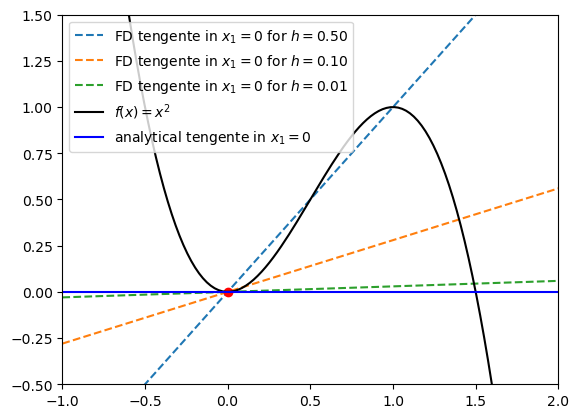

In [1]:
import matplotlib.pylab as plt
from numpy import linspace

def f(x):
    return 3*x**2 - 2*x**3

def fp(x):
    return 6*x - 6*x**2

x   = linspace(-1.0,2.0,128)
y   = f(x)

xp1 = 0.0
for h in [0.5,0.1,0.01]: 
    fp1 = ( f(xp1 + h) - f(xp1) ) / h
    yp1 = fp1 * (x - xp1) + f( xp1 )

    plt.plot(x,yp1, linestyle='--', label='FD tengente in $x_1=0$ for $h=$%.2f'%h)

plt.plot(xp1,f(xp1),marker='o',color='red')
plt.plot(x,y,linestyle='-',color='black',label='$f(x)=x^2$')

yp1_ana = fp(xp1)* (x - xp1) + f( xp1 )
plt.plot(x,yp1_ana,linestyle='-',  color='blue', label='analytical tengente in $x_1=0$')

plt.legend()
plt.xlim(-1.0,+2.0)
plt.ylim(-0.5,+1.5)

<hr style="border:1px solid grey">

### Développement de Taylor et erreur sur les différences finies *progressives* et *régressives*

$\require{color}$
L'utilisation d'un développement de Taylor au 3e ordre suivant $h$ pour $x$ au voisinnage de $x+h$ nous donne[<sup>1</sup>](#fn1) :
$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(x) + h^3\epsilon(h)\quad\quad\textcolor{green}{(3)}$$
A partir de cette relation, on peut déduire l'erreur commise par l'approximation des différences finies *progressives* : 
$$f'(x) = \frac{f(x+h)-f(x)}{h} - \left( \textcolor{blue}{\frac{h}{2!}f''(x)} + \frac{h^2}{3!}f'''(x) + h^2\epsilon(h) \right)$$
Dans l'expression ci-dessus le terme dominant est $\frac{h}{2!}f''(x) $ dans ce cas l'erreur est linéaire par rapport $h$ et on obtient :
$$f'(x) = \frac{f(x+h)-f(x)}{h} + O(h)$$
De la même manière on peut utiliser le développement de Talor pour l'approximation des différences finies *régressives* :
$$f(x-h) = f(x) - hf'(x) + \frac{h^2}{2!}f''(x) - \frac{h^3}{3!}f'''(x) - h^3\epsilon(h)\quad\quad\textcolor{green}{(4)}$$
Il suit :
$$f'(x) = \frac{f(x)-f(x-h)}{h} - \left(\textcolor{blue}{- \frac{h}{2!}f''(x)} + \frac{h^2}{3!}f'''(x) + h^2\epsilon(h)\right)$$
L'erreur sur $f(x-h)$ est aussi linéaire par rapport à $h$.


<span id="fn1"> $^1$ $h^3\epsilon(h)$ représente l'erreur de truncation de l'expansion de Taylor avec $\lim_{h\rightarrow 0}\epsilon(h)= 0$. On utilisera l'abréviation $O(h^p)$ pour $h^p\epsilon(h)$ .</span>

##### Exercise 4.1 <hr style="border:1px solid grey">

Pour $f(x)=3x^2-2x^3$ calculer la valeur analytique de la dérivée à $x_1 = 0$ et $x_2=1$. Faire afficher le résultat. Calculer la valeur de la dérivée numérique en utilisant la formule de différences finies *progressive* avec $h=0.01$. Enfin, calculer la correction d'ordre $h$ et affiner le résultat numérique.

<span style="color:red">**solution / DF progressive :**</span>

In [ ]:
import matplotlib.pylab as plt
from numpy import linspace

def f(x):
    return 3*x**2 - 2*x**3

def fp(x):
    return 6*x - 6*x**2

def fpp(x):
    return 6 - 12*x

xp1 = 0.0
xp2 = 1.0
h   = 0.01

fp1 = ( f(xp1 + h) - f(xp1) ) / h
fp2 = ( f(xp2 + h) - f(xp2) ) / h

fp1_err = fpp(xp1)*h/2
fp2_err = fpp(xp2)*h/2

fp1_ana = fp(xp1) 
fp2_ana = fp(xp2) 

print('          analytical derivative at x1 = %.6f'%fp1_ana)
print('          numerical  derivative at x1 = %.6f'%fp1,'for h = %.2f'%h)
print('corrected numerical  derivative at x1 = %.6f'%(fp1-fp1_err),'for h = %.2f'%h)
print()
print('          analytical derivative at x2 = %.6f'%fp2_ana)
print('          numerical  derivative at x2 = %.6f'%fp2,'for h = %.2f'%h)
print('corrected numerical  derivative at x2 = %.6f'%(fp2-fp2_err),'for h = %.2f'%h)

<hr style="border:1px solid grey">

##### Exercise 4.2 <hr style="border:1px solid grey">

Reprendre l'***exercice 4.1*** par la méthode des différences finies *regressives*.

<span style="color:red">**solution / DF régressive :**</span>

In [ ]:
import matplotlib.pylab as plt
from numpy import linspace

def f(x):
    return 3*x**2 - 2*x**3

def fp(x):
    return 6*x - 6*x**2

def fpp(x):
    return 6 - 12*x


xp1 = 0.0
xp2 = 1.0
h   = 0.01

fp1 = ( f(xp1) - f(xp1 - h) ) / h
fp2 = ( f(xp2) - f(xp2 - h) ) / h

fp1_err = fpp(xp1)*h/2
fp2_err = fpp(xp2)*h/2

fp1_ana = fp(xp1) 
fp2_ana = fp(xp2) 

print('          analytical derivative at x1 = %.6f'%fp1_ana)
print('          numerical  derivative at x1 = %.6f'%fp1,'for h = %.2f'%h)
print('corrected numerical  derivative at x1 = %.6f'%(fp1+fp1_err),'for h = %.2f'%h)
print()
print('          analytical derivative at x2 = %.6f'%fp2_ana)
print('          numerical  derivative at x2 = %.6f'%fp2,'for h = %.2f'%h)
print('corrected numerical  derivative at x2 = %.6f'%(fp2+fp2_err),'for h = %.2f'%h)

<hr style="border:1px solid grey">

### Approximation des différences finies *centrée* (central finite difference)

Par substraction du développement de Taylor *progressif*  de l'***équation*** $\textcolor{green}{(3)}$ au développement de Taylor *régressif* de l'***équation*** $\textcolor{green}{(4)}$, on obtient une nouvelle définition pour la différence finie, appelée approximation des différences finies *centrée* :
$$f'(x) = \frac{f(x+h)-f(x-h)}{2h} - \left(\textcolor{blue}{\frac{h^2}{3!}f'''(x)} + h^2\epsilon(h)\right)$$

On s'aperçoit ici que l'erreur est au deuxième ordre par rapport à $h$. Pour une valeur donnée de $h$, on s'attend à ce que cette nouvelle approximation soit plus précise que les versions *progressive* et *régressive*.

##### Exercise 4.3 <hr style="border:1px solid grey">

Pour $f(x)=3x^2-2x^3$ Calculer la valeur de la dérivée numérique en  à $x_1 = 0$ et $x_2=1$ en utilisant la formule de différences finies *centrées* avec $h=0.01$. Puis, calculer la correction d'ordre $h^2$ et affiner le résultat numérique.

<span style="color:red">**solution :**</span>

In [ ]:
import matplotlib.pylab as plt
from numpy import linspace

def f(x):
    return 3*x**2 - 2*x**3

def fp(x):
    return 6*x - 6*x**2

def fpp(x):
    return 6 - 12*x

def fppp():
    return -12

xp1 = 0.0
xp2 = 1.0
h   = 0.01

fp1 = ( f(xp1 + h) - f(xp1 - h) ) / (2*h)
fp2 = ( f(xp2 + h) - f(xp2 - h) ) / (2*h)

fp1_err = fppp()*h**2/6
fp2_err = fppp()*h**2/6

fp1_ana = fp(xp1) 
fp2_ana = fp(xp2) 

print('          analytical derivative at x1 = %.12f'%fp1_ana)
print('          numerical  derivative at x1 = %.12f'%fp1,'for h = %.2f'%h)
print('corrected numerical  derivative at x1 = %.12f'%(fp1-fp1_err),'for h = %.2f'%h)
print()
print('          analytical derivative at x2 = %.12f'%fp2_ana)
print('          numerical  derivative at x2 = %.12f'%fp2,'for h = %.2f'%h)
print('corrected numerical  derivative at x2 = %.12f'%(fp2-fp2_err),'for h = %.2f'%h)

<hr style="border:1px solid grey">

## <hr style="border:1px solid black">  Différences finies et méthode d'Euler <hr style="border:1px solid black">

A partir des méthodes de différences finies pour le calcul de dérivées décrites plus haut on peut aussi élaborer une méthode de résolution d'équations différentielles. Ici on considèrera seulement les équations du premier ordre du type : $$\frac{dy}{dt}=f(t)\quad\quad\textcolor{green}{(5)}$$ 
>A partir de l'***équation*** $\textcolor{green}{(1)}$, en négligeant les ordre supérieur à $h$ on peut approximer $y'(t)$ par :
$$\frac{dy}{dt}=f(t)\simeq\frac{y(t+\delta t) - y(t)}{\delta t}$$
ou $\delta t\equiv h$ correspond au pas de temps. On peut alors procéder à une integration pas à pas de l'***équation*** $\textcolor{green}{(5)}$ suivant:
$$y(t+\Delta t) = y(t) + hf(t)$$
Connaisant les conditions initiales $y_0=y(t_0)$ et la valeur de $f(t_i)$ pour chaque valeur $t_i\in[t_0,t_\infty]$ on peut prédire la valeur de $y$ au pas $t_{i+1}=t_i+h$. L'***équation*** $\textcolor{green}{(5)}$ peut-être réécrite suivant :
$$y(t_{i+1}) = y(t_i) + hf(t_i)\quad\quad\textcolor{green}{(6)}$$ 

Cette méthode d'intégration est appelée méthode d'Euler explicite.

> Notons qu'il existe une autre manière de trouver la relation de récurrence ci-dessus, en explicitant l'intégration par pas de temps successif. En d'autres termes, à partir de  l'***équation*** $\textcolor{green}{(5)}$, nous obtenons : $$dy=f(t)dt\quad\quad\textcolor{green}{(7)}$$ L'intégration numérique de l'***équation*** $\textcolor{green}{(7)}$ sur l'intervalle $(t_{i+1}-t_i)$ s'écrit : $$\int^{t_{i+1}}_{t_{i}}dy = \int^{t_{i+1}}_{t_{i}}f(t)dt$$ 
où le membre de droite de l'équation peut-être approximé par l'aire du rectangle
de côtés $h=t_{i+1} - t_{i}$ et $f(t_i)$.
Ce qui donne : $$y(t_{i+1}) - y(t_{i}) \simeq  hf(t_i)$$

Ci dessous, sont représentés les rectangles d'aire $hf(t_i)$ pour $f=3x^2-2x^3$ et $t\in[-1,2]$ avec un pas de $h=0.2$. On remarquera l'erreur associée à la méthode des rectangles.

In [ ]:
from numpy import linspace, arange
import matplotlib.pyplot as plt

tmin = -1
tmax = +2
h    = +0.2

t = arange(tmin, tmax+h, h)
f = 3*t**2 - 2*t**3
plt.plot(t,f,marker='o',linestyle='-',color='blue')
plt.fill_between(t, f, alpha=0.2, interpolate=True)

for i in range(len(t)-1):
    t_rect = [t[i], t[i], t[i+1], t[i+1], t[i]]
    f_rect = [0   , f[i], f[i]  , 0     , 0   ]
    plt.plot(t_rect,f_rect,marker='',linestyle='-',color='red')
    
plt.xlabel('$t_i$')
plt.ylabel('$f(t_i)$')
plt.xticks(arange(tmin, tmax+h, h*2))
plt.show()

##### Exercise 4.4 <hr style="border:1px solid grey">

En utilisant le programme précédent, calculer l'aire de la fonction $f(x)=3x^2-2x^3$ pour $h=0.2$ et $t\in[-1,2]$. Comparer à la valeur théorique de $3/2$ en faisant afficher l'erreur. Recommencer pour $h=0.1,0.01,0.001,0.0001,0.00001$ (on pourra utiliser une boucle).

<span style="color:red">**solution :**</span>

In [ ]:
tmin = -1
tmax = +2

for h in [0.2,0.1,0.01,0.001,0.0001,0.00001]:

    t = arange(tmin, tmax+h, h)
    f = 3*t**2 - 2*t**3
    
    integral = 0.0
    for i in range(len(t)-1):
        integral = integral + h*f[i]
        
    print('integral = %.6f'%integral, 'erreur = %.6f'%(integral-1.5))

<hr style="border:1px solid grey">

### Exemple d'application de la méthode d'Euler

Prenons par example l'équation suivante :
$$\frac{dy}{dt}=-y$$
avec la condition initiale $y_0=100$ et la solution analytique $y(t)=y_0\exp(-t)$.
> Discrétisons $t$ pour $t\in[0,5]$ avec un pas $h=0.1$ 

In [ ]:
from numpy import arange, linspace, exp, zeros

h = 0.1
t = arange(0,5+h,h)

> Définissons le membre de droite de ***équation*** $\textcolor{green}{(5)}$ :

In [ ]:
def f(x):
    return -x

> Calculons pas à pas $y(t_{i+1})=y(t_i) + hf(t_i)$ avec $y(t_0)=100$

In [ ]:
y0 = 100
yi =  y0
for i in range(1,len(t)):
    yi = yi + h*f(yi)
    #print('index %s : ti = %.3f, yi = %.3f'%(i,t[i],yi))

> Sauvegardons chaque valeur de $y(t_i)$ dans un tableau `y_euler`

In [ ]:
y0 = 100
y_euler    = zeros(len(t))
y_euler[0] = y0
for i in range(len(t)-1):
    y_euler[i+1] = y_euler[i] + h*f(y_euler[i])

> Représentons $y(t)$ obtenu par la méthode d'Euler $(y_\textrm{Euler})$ et par la solution analytique $(y_\textrm{exact})$

In [ ]:
import matplotlib.pyplot as plt 

y_exact= y0*exp(-t)

plt.plot(t,y_euler, linestyle='-', label='Euler')
plt.plot(t,y_exact, linestyle='--',label='Analytic')
plt.xlabel('$t$ (in sec.)')
plt.ylabel('$y(t)$')
plt.legend()

> Représentons l'ecart de la solution numérique par rapport à la solution analytique

In [ ]:
import matplotlib.pyplot as plt 

y_err = y_exact - y_euler

plt.plot(t,y_err, linestyle='-', label='Euler')
plt.xlabel('$t$ (in sec.)')
plt.ylabel('$\Delta y(t)$')
plt.legend()

##### Exercise 4.5 <hr style="border:1px solid grey">

Reprendre la solution numérique de l'équation $$\frac{dy}{dt}=-y,\quad y_0=100$$ pour des pas de temps $h=\{0.1,0.05,0.01\}$ et représenter l'erreur par rapport aux résultats analytiques. Qu'observe t-on ? Est-ce attendu ?

<span style="color:red">**solution :**</span>

In [ ]:
from numpy import arange, linspace, exp, zeros

def f(x):
    return -x

y0 = 100

for h in [0.1, 0.05, 0.01]:

    t          = arange(0,5+h,h)
    y_euler    = zeros(len(t))
    y_euler[0] = y0
    for i in range(len(t)-1):
        y_euler[i+1] = y_euler[i] + h*f(y_euler[i])    

    y_exact = y0*exp(-t)
    y_err   = y_exact - y_euler

    plt.plot(t, y_err, linestyle='-', label='Euler with $h=%.4f$'%h)

plt.xlabel('$t$ (in sec.)')
plt.ylabel('Error $\Delta y(t)$')
plt.legend()

<hr style="border:1px solid grey">

##### Exercise 4.6 <hr style="border:1px solid grey">

A partir de l'approximation des différences finies *centrées* la résolution numérique de l'équation différentielle $$\frac{dy}{dt}=-y,\quad y_0=100$$ s'écrit :
$$y(t+h) = y(t-h) + 2hf(t)$$
c'est-à-dire :
$$y(t_{i+1}) = y(t_{i-1}) + 2hf(t_i)$$
1. Ecrire le programme qui permet cette résolution. On prendra $h=0.01$, $y_0 =100$ et $y_1 =99$.
2. Sur le même graphique représenter les résultats analytique et numérique.
3. Sur un deuxième graphique représenter l'erreur des différences finies *centrées* et des différences finies *progressives*.
4. Recommencer avec les conditions initiales suivantes : $y_0 =100$ et $y_1 =99.005$. Conclure.

<span style="color:red">**solution :**</span>

In [ ]:
from numpy import arange, linspace, exp

def f(x):
    return -x

y0 = 100

h  = 0.01
t  = arange(0,5+h,h)
y_euler_c    = zeros(len(t))
y_euler_c[0] = y0
y_euler_c[1] = 99
for i in range(1,len(t)-1):
    y_euler_c[i+1] = y_euler_c[i-1] + 2*h*f(y_euler_c[i])
    
y_exact = y0*exp(-t)    
y_err_c = y_exact - y_euler_c

plt.plot(t,y_euler_c, linestyle='-', label='Euler central FD')
plt.plot(t,y_exact, linestyle='--',  label='Analytic')
plt.xlabel('$t$ (in sec.)')
plt.ylabel('$y(t)$')
plt.legend()

In [ ]:
plt.plot(t,y_err_c, linestyle='-', label='Euler central FD with $h=%.4f$'%0.01)
#plt.plot(t,y_err, linestyle='-', label='Euler progressive FD with $h=%.4f$'%0.01)

plt.xlabel('$t$ (in sec.)')
plt.ylabel('Error $\Delta y(t)$')
plt.legend()

<hr style="border:1px solid grey">

## <hr style="border:1px solid black">  Application aux équations de la dynamique <hr style="border:1px solid black">

L'objectif ici est de  construire les trajectoires de points matériels soumis à diverses forces (ressort, poids, frottement, gravité) de façon numérique, c'est-à-dire sans résoudre analytiquement des équations différentielles de la dynamique :

$$\begin{align}
\vec f &=m \vec a =m \frac {d \vec v}{dt}\quad\quad\textcolor{green}{(8)}\\
\vec v &= \frac {d \vec r}{dt}
\end{align}$$

avec $\vec{v}$ le vecteur vitesse de coordonnées $(v_x,v_y,v_z)$ et $\vec{r}$ le vecteur position de coordonnées $(x,y,z)$. A partir de la méthode d'Euler, cf. ***équation*** $\textcolor{green}{(6)}$, le calcul de $\vec{v}$ et $\vec{r}$ peut s'obtenir par récurrence suivant :

$$\begin{align}
\vec{r}(t_{i+1}) &= \vec{r}(t_i) + h\ \vec{v}(t_i)\\
\vec{v}(t_{i+1}) &= \vec{v}(t_i) + \frac{h}{m}\vec{f}(t_i)
\end{align}$$

avec $h=t_{i+1}-t_{i}$ le pas d'intégration des équations du mouvement. Dans le cas de mouvements  unidirectionnels, on a $\vec{r}=x\vec{e}_x$, $\vec{r}=v\vec{e}_x$ et $\vec{f}=f\vec{e}_x$
Ce qui nous donne 1 équation pour la position :

$$\begin{align}
x(t_{i+1})   &= x(t_i) + h\;v(t_i)\\   
\end{align}$$

et 1 équation pour la vitesse :

$$\begin{align}
v(t_{i+1}) &= v(t_i)+\frac{h}m f\left(x(t_i)\right) \\ 
\end{align}$$


On voit qu'à partir de ces équations, si on connait $(x,v)$ à un instant $t_i$ donné, on est alors capable de déterminer $(x,v)$ à un instant ultérieur $t_{i+1}$ et ainsi de construire pas à pas la trajectoire d'un point matériel au cours du temps.

### Mouvement d'un oscillateur harmonique 1D méthode d'Euler

> On souhaite étudier le mouvement d'un objet de masse $m$ soumis à une force de rappel : $$f=-kx \quad\quad\textcolor{green}{(9)}$$ (loi de Hooke) avec $m=1$ kg, $k=4$ N/m. On négligera les frottements. Le temps d'étude sera de $t_\textrm{max}=4\pi$ s, avec un pas de discrétisation de $h=0.01$ s. On utilisera les conditions initiales $x(t_0)=0.1$ et $v(t_0)=0$.  On rappelle la solutions analytique de l'équation du mouvement : $x(t) = x_0\cos(\omega t)$ avec $\omega=\sqrt{k/m}$.

> On commence par définir le membre de droite de l'équation de la dynamique :

In [ ]:
def f(x):
    k = 4.0
    return -k*x

> On discrétise l'axe du temps :

In [ ]:
from numpy import pi, arange, zeros, cos, sqrt

tmin = 0.0
tmax = 4*pi
h    = 0.01
t    = arange(tmin,tmax,h)

> On initialise $m$, $k$, les tableaux pour $x$ et $v$ ainsi que les conditions initiales :

In [ ]:
m = 1.0
k = 4.0

x = zeros(len(t))
v = zeros(len(t))

x0 = 0.1
v0 = 0.0

> On applique la relation de récurrence de Euler à $x$ et à $v$ :

In [ ]:
x[0] = x0
v[0] = v0
for i in range(len(t)-1):
    x[i+1] = x[i] + h*v[i]
    v[i+1] = v[i] + h*f(x[i])/m

> Tracer des lois horaires $x(t)$ et $v(t)$ et de la solution analytique :

In [ ]:
import matplotlib.pylab as plt

x_analy = x0*cos( sqrt(k/m)*t )

plt.plot(t,x,marker='',label='$x(t)$')
plt.plot(t,v,marker='',label='$v(t)$')
plt.plot(t,x_analy,marker='',label='$x(t)$ analytic',)
plt.xlabel('$t$ (in s)')
plt.legend()

> Tracer du portrait de phase $(x(t),v(t))$ et repérage des conditions initiales :

In [ ]:
plt.plot(x,v,marker='')
plt.plot(x0,v0,marker='o')
plt.xlabel('$x(t)$')
plt.ylabel('$v(t)$')

Dans le cas idéal, sans frottement, l'énergie mécanique $(E_m)$ doit être une constante du mouvement. Cette énergie est donnée par la somme de l'énergie cinétique :
$$E_c(t)= \frac{1}{2}mv(t)^2$$
et de l'énergie potentielle, qui dans le cas d'un oscillateur harmonique 1D est donnée par :
$$E_p(t)= \frac{1}{2}kx(t)^2$$


> Tracer de l'évolution de $E_m(t)$, $E_c(t)$ et $E_p(t)$ :

In [ ]:
Ec = 1/2*m*v**2
Ep = 1/2*k*x**2
Em = Ec + Ep

plt.plot(t,Ec,marker='',label='$E_c(t)$')
plt.plot(t,Ep,marker='',label='$E_p(t)$')
plt.plot(t,Em,marker='',label='$E_m(t)$')
plt.xlabel('$t$ (in sec)')
plt.ylabel('Energy (in J)')
plt.legend()

> A partir de des ***équations*** $\textcolor{green}{(8)}$ et $\textcolor{green}{(9)}$ on peut montrer que : $$E_m(t_{i+1}) = E_m(t_{i})\left(1+h^2\frac{k}{m}\right)\quad\quad\textcolor{green}{(10)}$$
On remarque que l'énergie totale est conservée si et seulement si $h=0$. Dans tous les autres cas l'énergie augmente à une vitesse en $(1+\alpha h^2)$. Ci-dessous l'évolution de l'énergie mécanique en fonction du temps est représenté en utilisant ***l'équation*** $\textcolor{green}{(10)}$.

In [ ]:
Em_analy = zeros(len(t))

Em_analy[0] = Ec[0] + Ep[0]
for i in range(len(t)-1):
    Em_analy[i+1] = Em_analy[i]*(1 + h**2*k/m) 

plt.plot(t,Ec,marker='',label='$E_c(t)$')
plt.plot(t,Ep,marker='',label='$E_p(t)$')
plt.plot(t,Em,marker='',label='$E_m(t)$')
plt.plot(t,Em_analy,marker='',linestyle='--',label='$E_m(t)$ analytique')

plt.xlabel('$t$ (in sec)')
plt.ylabel('Energy (in J)')
plt.legend()

##### Exercise 4.7 <hr style="border:1px solid grey">

Nous avons vu que la méthode d'Euler appliquée à l'intégration des équations du mouvement ne permet pas de conserver l'énergie. Dans le cas 1D, ces équations sont données par :

$$\begin{align}
x(t_{i+1}) &= \textcolor{blue}{x(t_i)} + h\;v(t_i)\\   
v(t_{i+1}) &= v(t_i)+\frac{h}m \textcolor{blue}{f\left(x(t_{i})\right)} \\ 
\end{align}$$

Ici on propose d'étudier la méthode de Hooke-Newton décrite ci-dessous :
$$\begin{align}
\textcolor{blue}{x(t_{i+1})} &= x(t_i) + h\;v(t_i)\\   
v(t_{i+1}) &= v(t_i)+\frac{h}m \textcolor{blue}{f\left(x(t_{i+1})\right)} \\ 
\end{align}$$
pour cette dernière, on remarquera que pour prédire la vitesse au temps $t_{i+1}$ la force est maintenant évaluée à la position $x(t_{i+1})$.

Reprendre l'étude du mouvement d'un oscillateur harmonique 1D en utilisant ces nouvelles équations. On utilisera les mêmes paramètres de calcul.

In [ ]:
from numpy import pi, arange, zeros, sqrt

def f(x):
    k = 4.0
    return -k*x

tmin = 0.0
tmax = 4*pi
h    = 0.01
t    = arange(tmin,tmax,h)

m = 1.0
k = 4.0

x = zeros(len(t))
v = zeros(len(t))

x0 = 0.1
v0 = 0.0

x[0] = x0
v[0] = v0
for i in range(len(t)-1):
    x[i+1] = x[i] + h*v[i]
    v[i+1] = v[i] + h*f(x[i+1])/m

In [ ]:
import matplotlib.pylab as plt

plt.plot(t,x,marker='',label='$x(t)$')
plt.plot(t,v,marker='',label='$v(t)$')
plt.xlabel('$t$ (in s)')
plt.legend()

In [ ]:
plt.plot(x,v,marker='')
plt.plot(x0,v0,marker='o')
plt.xlabel('$x(t)$')
plt.ylabel('$v(t)$')

In [ ]:
Ec = 1/2*m*v**2
Ep = 1/2*k*x**2
Em = Ec + Ep

plt.plot(t,Ec,marker='',label='$E_c(t)$')
plt.plot(t,Ep,marker='',label='$E_p(t)$')
plt.plot(t,Em,marker='',label='$E_m(t)$')
plt.xlabel('$t$ (in sec)')
plt.ylabel('Energy (in J)')
plt.legend()

<hr style="border:1px solid grey">